# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.
- Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything. 

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [1]:
%matplotlib inline
import os
import pandas as pd
import json
import folium
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import warnings
sns.set_context('notebook')
warnings.filterwarnings('ignore')

In [2]:
data_folder = 'data/'

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

LEGO_DATA_FOLDER =data + 'lego'

# A

load the borders from the topojson file, and then add the borders to Swtizerland part in the map

In [3]:
canton_data_path =data_folder + 'ch-cantons.topojson.json'
canton_json_data = json.load(open(canton_data_path))
m_ch = folium.Map(location=[46.8, 8],tiles='cartodbpositron',
                     zoom_start=8)
folium.TopoJson(canton_json_data, object_path='objects.cantons',).add_to(m_ch)
m_ch.save('chBorders.html')
m_ch

# B

In [4]:
communes_pop=pd.read_excel(data_folder +'communes_pop.xls')

read the latest population data as well as other information from the xls file

In [5]:
pop_2017=communes_pop.iloc[6:2412, [0,9]]
pop_2017.rename(columns={'su-f-01.02.04.07':'area', 'Unnamed: 9':'population'}, inplace = True)
pop_2017=pop_2017[[str(pop_2017['area'][i])[0]=='.' for i in pop_2017.index]]
pop_2017.head()


,area,population
8,......0001 Aeugst am Albis,1941
9,......0002 Affoltern am Albis,12146
10,......0003 Bonstetten,5512
11,......0004 Hausen am Albis,3664
12,......0005 Hedingen,3694


get the columns and rows that contain useful information for the task

In this task only the communes name and corresponding latest population are needed

In [6]:
urban_pop=pop_2017[pop_2017['population']>=10000]

Since there is no clear classification of rural communes and urban ones, we just classify the communes by the population quantity.

Those with more than 10000 population are urban communes, the others are rural ones.

In [7]:
urban_pop.sort_values(ascending=False, by='population').head(10)

,area,population
186,......0261 Zürich,409241
2326,......6621 Genève,200548
998,......2701 Basel,171513
1967,......5586 Lausanne,138905
382,......0351 Bern,133798
170,......0230 Winterthur,110912
551,......1061 Luzern,81401
1161,......3203 St. Gallen,75522
1746,......5192 Lugano,63494
230,......0371 Biel/Bienne,54640


take a look at the communes with most population

From the figures, we can see there are several communes with exremely more people than others. 

In [8]:
rural_pop=pop_2017[pop_2017['population']<10000]
rural_pop.head()

,area,population
8,......0001 Aeugst am Albis,1941
10,......0003 Bonstetten,5512
11,......0004 Hausen am Albis,3664
12,......0005 Hedingen,3694
13,......0006 Kappel am Albis,1125


 Overall Population Histogram

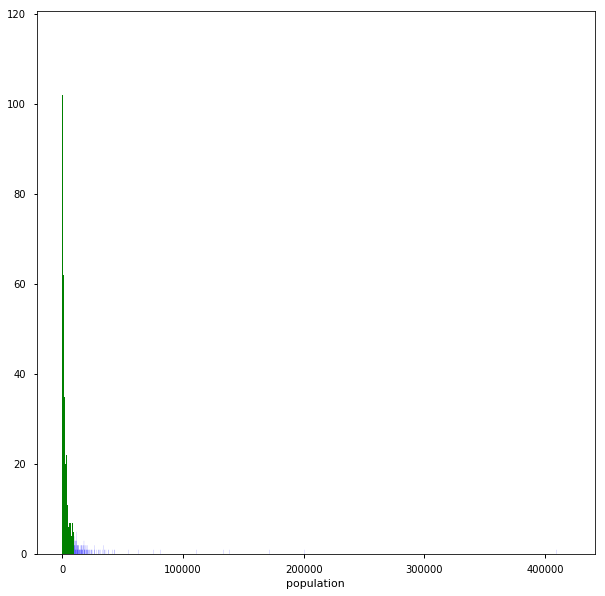

In [9]:
plt.subplots(1,1,figsize = (10,10))
plt.xlabel('population')
_ , _ , _ = plt.hist(rural_pop['population'],bins=range(0,10000,100),facecolor='green',histtype='stepfilled',stacked=True)
_ , _ , _ = plt.hist(urban_pop['population'],bins=range(10000,420000,100),facecolor='blue',histtype='stepfilled',stacked=True)

plt.show()

plot a histogram with all communes (bar size = 100), the green part represents rural communes and the blue part represents urban ones

From the histogram, we can see the data is distributed like long-tailed , with more communes with smaller population. The counts decrease as the commune population grows. The counts of communes with more than 50000 population are rather rare. 

Since the 'tail' seems too long because of some extremely large data, to observe the distribution more clearly, we seperately plot the rural and urban histogram as follows:



 Rural Communes Histogram

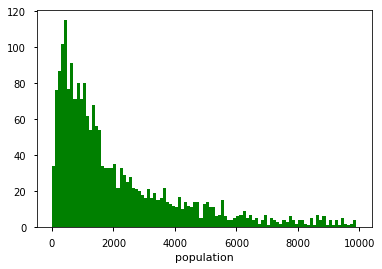

In [10]:
plt.xlabel('population')
_ , _ , _ = plt.hist(rural_pop['population'],bins=range(0,10000,100),facecolor='green',histtype='stepfilled',stacked=True)

Among the rural communes, the communes with less than 1000 people show a increase (may be deemed as outliers). After that the counts gradually decrease as population grows despite some small fluctuations.

 Urban Communes Histogram

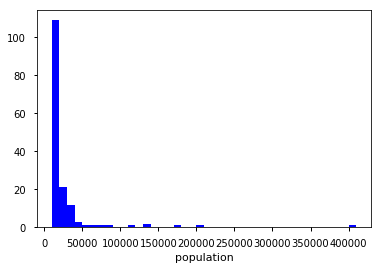

In [11]:
plt.xlabel('population')
_ , _ , _ = plt.hist(urban_pop['population'],bins=range(10000,420000,10000),facecolor='blue',histtype='stepfilled',stacked=True)

There is also a decrease in the communes with less than 100000 population. After that there is no obviously similiar regularities among the comuunes and the data is distributed discretely.Extremely large data that don't seem to follow the same distribution also exist.

In [12]:
urban_pop[urban_pop['population']>50000]

,area,population
170,......0230 Winterthur,110912
186,......0261 Zürich,409241
230,......0371 Biel/Bienne,54640
382,......0351 Bern,133798
551,......1061 Luzern,81401
998,......2701 Basel,171513
1161,......3203 St. Gallen,75522
1746,......5192 Lugano,63494
1967,......5586 Lausanne,138905
2326,......6621 Genève,200548


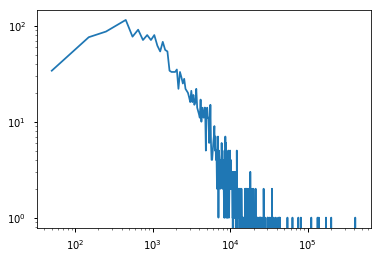

In [13]:
cnts, bins = np.histogram(pop_2017['population'],bins=range(0,420000,100))
bins = (bins[:-1] + bins[1:]) / 2
plt.loglog(bins, cnts)

The observation above can also be proved in the log-log line plot of overall distribution, where we can see a slight increase in the smallest rural communes and discrete extemely large-size urban communes that do not seem to follow the same distribution.

#  C

To get an obvious distribution of overall communes and corresponding population, we later plot a histogram of communes with less than 20000 population.

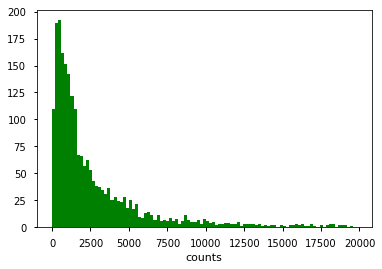

In [14]:
pops=pop_2017[pop_2017['population']<20000]
plt.xlabel('population')
plt.xlabel('counts')
_ , _ , _ = plt.hist(pops['population'],bins=range(0,20000,200),facecolor='green',histtype='stepfilled',stacked=True)
plt.show()

For easy analysis and observation of the task, we transform the bar histogram to a line plot as follows.

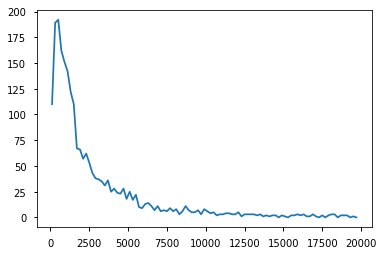

In [15]:
cnts, bins = np.histogram(pops['population'],bins=range(0,20000,200))
bins = (bins[:-1] + bins[1:]) / 2
plt.plot(bins, cnts)

# PDF (bin size = 200)

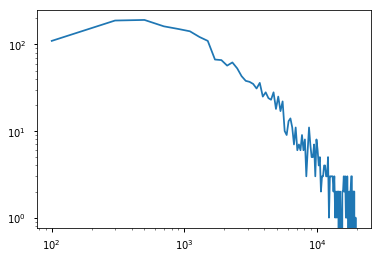

In [16]:
cnts, bins = np.histogram(pops['population'],bins=range(0,20000,200))
bins = (bins[:-1] + bins[1:]) / 2
plt.loglog(bins, cnts)

When we set the bin size as 200 (each bar contains commune count information in the range of 200 population ), the plot can contain more distribution within population and contain more information among bars,.

Despite the increase at first, the plot show an obvious decrease as well as many strong fluctuations.

# PDF (bin size = 1000)

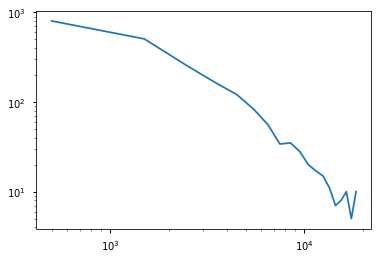

In [17]:
cnts, bins = np.histogram(pops['population'],bins=range(0,20000,1000))
bins = (bins[:-1] + bins[1:]) / 2
plt.loglog(bins, cnts)

When we set the bin size as 1000(each bar contains commune count information in the range of 1000 population ), there is more information within one single bar.

Since the overall data are distributed similarly, the plot shows a relatively smooth decrease with some slight fluctuations.

# CCDF

plot the ccdf plot according to its mathematical defination and log-log function

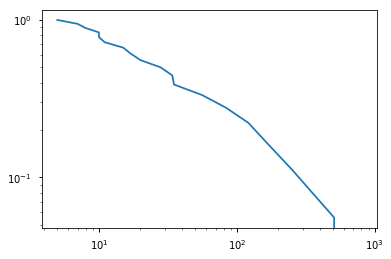

In [18]:
cnts, bins = np.histogram(pops['population'],bins=range(0,20000,1000))
cnts.sort()
p = 1. *np. arange(len(cnts)) / (len(cnts)-1)
p = [1-i for i in p]  
cnts=np.asarray(cnts,dtype=float)
#x = np.log10(data)                         # logx
#y = np.log10(p)                            # log(1-F(x))
plt.loglog(cnts,p)
plt.show()

The plot is close to a smooth line, which conforms to mathematical characteristics

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

#### A)

In [19]:
canton_data_path =data_folder + 'ch-cantons.topojson.json'
cantonBorders = json.load(open(canton_data_path))
cantonNamesFile = 'data/cantons.csv'
cantonNamesData = pd.read_csv(cantonNamesFile)
cantonNamesData.head()

,Code,Canton of,Since,Capital,Population,GDP percapita (2014)[16]in CHF,Area (km2),Density (per km2)[Note 4],No. munic.,Official languages
0,ZH,Zürich,1351,Zürich,"1,504,346[17]","96,411","1,729",701,168,German
1,BE,Bern,1353,Bern,"1,031,126[18]","76,307","5,960",158,352,"German, French"
2,LU,Luzern,1332,Lucerne,"403,397[19]","65,119","1,494",233,83,German
3,UR,Uri,1291,Altdorf,"36,145[20]","51,332","1,077",33,20,German
4,SZ,Schwyz,1291,Schwyz,"155,863[21]","58,788",908,143,30,German


In [20]:
voteDataFile = 'data/voters.xls'
voteData = pd.read_excel(voteDataFile, header=0, skiprows=[0,1,2,4,5], nrows=30, sheet_name='actuel (2014-2018)')

In [21]:
voteData.rename(columns={'Unnamed: 0':'area'}, inplace = True)
voteData.dropna(axis=0,how='all',inplace=True)
voteData.reset_index(inplace=True)

In [22]:
voteData

,index,area,Unnamed: 1,Année électorale 2),Participation,PLR 6),Unnamed: 5,PDC 7),Unnamed: 7,PS,...,JB,Unnamed: 55,Front,Unnamed: 57,Grut,Unnamed: 59,Autres 11),Unnamed: 61,K,Total
0,0,Zurich,NaN,2015.0,32.652497,17.327820,NaN,4.878712,NaN,19.716444,...,NaN,NaN,NaN,NaN,NaN,NaN,0.669707,NaN,NaN,100
1,1,Berne,NaN,2018.0,30.516313,11.717910,NaN,0.671415,NaN,22.328775,...,NaN,NaN,NaN,NaN,NaN,NaN,0.912781,NaN,NaN,100
2,2,Lucerne,NaN,2015.0,38.741267,21.039516,NaN,30.862513,NaN,11.848915,...,NaN,NaN,NaN,NaN,NaN,NaN,0.036129,NaN,NaN,100
3,3,Uri 1),NaN,2016.0,61.989056,26.856698,NaN,31.298814,NaN,12.984966,...,NaN,NaN,NaN,NaN,NaN,NaN,2.428270,NaN,NaN,100
4,4,Schwytz,NaN,2016.0,37.747088,21.628996,NaN,27.167707,NaN,12.925363,...,NaN,NaN,NaN,NaN,NaN,NaN,1.513578,NaN,NaN,100
5,6,Obwald,NaN,2018.0,53.793314,17.174703,NaN,29.803630,NaN,15.090867,...,NaN,NaN,NaN,NaN,NaN,NaN,13.398497,NaN,NaN,100
6,7,Nidwald,NaN,2018.0,54.921606,28.012430,NaN,26.750081,NaN,4.470053,...,NaN,NaN,NaN,NaN,NaN,NaN,1.446747,NaN,NaN,100
7,8,Glaris,NaN,2018.0,29.489675,18.392812,NaN,9.400847,NaN,12.750408,...,NaN,NaN,NaN,NaN,NaN,NaN,1.803643,NaN,NaN,100
8,9,Zoug,NaN,2014.0,42.939437,22.147887,NaN,26.783136,NaN,9.250912,...,NaN,NaN,NaN,NaN,NaN,NaN,1.579922,NaN,NaN,100
9,10,Fribourg,NaN,2016.0,39.302102,18.165508,NaN,23.707027,NaN,23.584309,...,NaN,NaN,NaN,NaN,NaN,NaN,3.973469,NaN,NaN,100


In [23]:
voteData=voteData[['area','UDC','Participation']]
voteData['id']=cantonNamesData['Code']
voteData

,area,UDC,Participation,id
0,Zurich,30.023215,32.652497,ZH
1,Berne,26.760869,30.516313,BE
2,Lucerne,24.115646,38.741267,LU
3,Uri 1),24.053191,61.989056,UR
4,Schwytz,33.115090,37.747088,SZ
5,Obwald,24.532303,53.793314,OW
6,Nidwald,25.916631,54.921606,NW
7,Glaris,25.275361,29.489675,GL
8,Zoug,23.631802,42.939437,ZG
9,Fribourg,19.717606,39.302102,FR


In [24]:
voteData=voteData.dropna()
voteData

,area,UDC,Participation,id
0,Zurich,30.023215,32.652497,ZH
1,Berne,26.760869,30.516313,BE
2,Lucerne,24.115646,38.741267,LU
3,Uri 1),24.053191,61.989056,UR
4,Schwytz,33.115090,37.747088,SZ
5,Obwald,24.532303,53.793314,OW
6,Nidwald,25.916631,54.921606,NW
7,Glaris,25.275361,29.489675,GL
8,Zoug,23.631802,42.939437,ZG
9,Fribourg,19.717606,39.302102,FR


In [25]:
chCoord = [46.8182, 8.2275]
ch_map = folium.Map(location=chCoord,zoom_start=8)
ch_map.choropleth(geo_data=cantonBorders,
                  data=voteData,
                  columns=['id','UDC'],
                  topojson='objects.cantons',
                  key_on='id',
                  fill_color='YlGn',
                  legend_name='The percentage of voters who voted for the party UDC',
                  reset=True)
folium.LayerControl().add_to(ch_map)

# canton AI & GR have NAN values
nan_handle_function = lambda data: {'fillColor':'#ffffff',
                                    'fillOpacity': '1' if (data['id']=='AI' or data['id']=='GR') else '0'}

folium.TopoJson(
    cantonBorders,
    'objects.cantons',
    style_function=nan_handle_function,
    control=False
).add_to(ch_map)

ch_map.save('UDCPercent.html')
ch_map

From the map, we could see that UDC is more popular in the German-speaking part of Switzerland.

#### B)

In [26]:
electionData = pd.read_excel(data_folder + "national_council_elections.xlsx", skiprows=range(0,8))
electionData['id'] = cantonNamesData['Code']
electionData = electionData.dropna()
electionData

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,id
0,Zurich,907623.0,428837.0,47.248362,ZH
1,Berne,729203.0,357770.0,49.063155,BE
2,Lucerne,271143.0,138096.0,50.931059,LU
3,Uri 1),26414.0,15091.0,57.132581,UR
4,Schwytz,102145.0,54857.0,53.705027,SZ
5,Obwald 1),26244.0,15617.0,59.506935,OW
6,Nidwald 1),30810.0,17971.0,58.328465,NW
7,Glaris 1),26268.0,10890.0,41.457286,GL
8,Zoug,74803.0,40200.0,53.741160,ZG
9,Fribourg,196027.0,92462.0,47.167992,FR


In [27]:
electionData.rename(columns={'Unnamed: 0':'area','Unnamed: 1':'voter_num'}, inplace = True)
electionData = electionData[['area','voter_num','id']]
electionData

,area,voter_num,id
0,Zurich,907623.0,ZH
1,Berne,729203.0,BE
2,Lucerne,271143.0,LU
3,Uri 1),26414.0,UR
4,Schwytz,102145.0,SZ
5,Obwald 1),26244.0,OW
6,Nidwald 1),30810.0,NW
7,Glaris 1),26268.0,GL
8,Zoug,74803.0,ZG
9,Fribourg,196027.0,FR


In [28]:
mergedData = pd.merge(voteData, electionData, on='id')
mergedData

,area_x,UDC,Participation,id,area_y,voter_num
0,Zurich,30.023215,32.652497,ZH,Zurich,907623.0
1,Berne,26.760869,30.516313,BE,Berne,729203.0
2,Lucerne,24.115646,38.741267,LU,Lucerne,271143.0
3,Uri 1),24.053191,61.989056,UR,Uri 1),26414.0
4,Schwytz,33.115090,37.747088,SZ,Schwytz,102145.0
5,Obwald,24.532303,53.793314,OW,Obwald 1),26244.0
6,Nidwald,25.916631,54.921606,NW,Nidwald 1),30810.0
7,Glaris,25.275361,29.489675,GL,Glaris 1),26268.0
8,Zoug,23.631802,42.939437,ZG,Zoug,74803.0
9,Fribourg,19.717606,39.302102,FR,Fribourg,196027.0


In [29]:
mergedData['UDC_voter_num'] = mergedData.voter_num * (mergedData.Participation/100) * (mergedData.UDC/100)
mergedData

,area_x,UDC,Participation,id,area_y,voter_num,UDC_voter_num
0,Zurich,30.023215,32.652497,ZH,Zurich,907623.0,88977.272344
1,Berne,26.760869,30.516313,BE,Berne,729203.0,59549.856891
2,Lucerne,24.115646,38.741267,LU,Lucerne,271143.0,25332.095474
3,Uri 1),24.053191,61.989056,UR,Uri 1),26414.0,3938.418719
4,Schwytz,33.115090,37.747088,SZ,Schwytz,102145.0,12768.106607
5,Obwald,24.532303,53.793314,OW,Obwald 1),26244.0,3463.352130
6,Nidwald,25.916631,54.921606,NW,Nidwald 1),30810.0,4385.442914
7,Glaris,25.275361,29.489675,GL,Glaris 1),26268.0,1957.917382
8,Zoug,23.631802,42.939437,ZG,Zoug,74803.0,7590.531849
9,Fribourg,19.717606,39.302102,FR,Fribourg,196027.0,15190.982227


In [1]:
chCoord = [46.8182, 8.2275]
ch_map = folium.Map(location=chCoord,zoom_start=8)
ch_map.choropleth(geo_data=cantonBorders,
                  data=mergedData,
                  columns=['id','UDC_voter_num'],
                  topojson='objects.cantons',
                  key_on='id',
                  fill_color='YlGn',
                  legend_name='The number of voters who voted for the party UDC',
                  reset=True)
folium.LayerControl().add_to(ch_map)

# canton AI & GR have NAN values
nan_handle_function = lambda data: {'fillColor':'#ffffff',
                                    'fillOpacity': '1' if (data['id']=='AI' or data['id']=='GR') else '0'}

folium.TopoJson(
    cantonBorders,
    'objects.cantons',
    style_function=nan_handle_function,
    control=False
).add_to(ch_map)

ch_map.save('UDCNumber.html')
ch_map

NameError: name 'folium' is not defined

#### C)

In case of a national election with majority voting(i.e. when a party needs to have the largest number of citizens voting for it among all parties), the visualization in *b)* is more informative, because it shows us the number of citizens voting for the party in each canton.

In case of a cantonal parliament election, the visualization in *a)* is more informative, because it shows us the percentage of voters voting for the party in each canton, we could know the results of each canton.

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

# 3 A

In [31]:
cantonBorders = json.load(open(canton_data_path))
cantonNamesFile = 'data/cantons.csv'
cantonNamesData = pd.read_csv(cantonNamesFile)
cantonNamesData.head()

,Code,Canton of,Since,Capital,Population,GDP percapita (2014)[16]in CHF,Area (km2),Density (per km2)[Note 4],No. munic.,Official languages
0,ZH,Zürich,1351,Zürich,"1,504,346[17]","96,411","1,729",701,168,German
1,BE,Bern,1353,Bern,"1,031,126[18]","76,307","5,960",158,352,"German, French"
2,LU,Luzern,1332,Lucerne,"403,397[19]","65,119","1,494",233,83,German
3,UR,Uri,1291,Altdorf,"36,145[20]","51,332","1,077",33,20,German
4,SZ,Schwyz,1291,Schwyz,"155,863[21]","58,788",908,143,30,German


In [32]:
voteDataFile = 'data/voters.xls'
voteData = pd.read_excel(voteDataFile, header=0, skiprows=[0,1,2,4,5], nrows=30, sheet_name='actuel (2014-2018)')

In [33]:
voteData.rename(columns={'Unnamed: 0':'area'}, inplace = True)
voteData.dropna(axis=0,how='all',inplace=True)
voteData.reset_index(inplace=True)
voteData=voteData[['area','PS','UDC']]

In [34]:
voteData['id']=cantonNamesData['Code']
voteData['Right Lean']=(voteData['UDC']-voteData['PS'])/(voteData['UDC']+voteData['PS'])
voteData.head()

,area,PS,UDC,id,Right Lean
0,Zurich,19.716444,30.023215,ZH,0.207214
1,Berne,22.328775,26.760869,BE,0.090286
2,Lucerne,11.848915,24.115646,LU,0.341078
3,Uri 1),12.984966,24.053191,UR,0.298833
4,Schwytz,12.925363,33.115090,SZ,0.438521


The vote information of canton Grisons and Appenzell Innerrhoden is missing. We set the canton color to white in the map

In [1]:
chCoord = [46.8182, 8.2275]
ch_map = folium.Map(location=chCoord,zoom_start=8)
ch_map.choropleth(geo_data=cantonBorders,
                  data=voteData,
                  columns=['id','Right Lean'],
                  topojson='objects.cantons',
                  key_on='id',
                  fill_color='YlGn',
                  legend_name='Right Lean Value',
                  reset=True)
folium.LayerControl().add_to(ch_map)
nan_handle_function = lambda data: {'fillColor':'#ffffff',
                                    'fillOpacity': '1' if (data['id']=='AI' or data['id']=='GR') else '0'}

folium.TopoJson(
    cantonBorders,
    'objects.cantons',
    style_function=nan_handle_function,
    control=False
).add_to(ch_map)
ch_map.save('Right_Lean_Map.html')
ch_map

NameError: name 'folium' is not defined

Except 2 cantons without voter information (white in the map),the cantons in Switerland tends to be more 'light lean' in the east.The eastern areas vote more for UDC.

# 3B

In [36]:
voteDataFile = 'data/voters.xls'
voteDataOld = pd.read_excel(voteDataFile, header=0, skiprows=[0,1,2,4,5], nrows=30, sheet_name='2010-2013')
voteDataOld.rename(columns={'Unnamed: 0':'area'}, inplace = True)
voteDataOld.dropna(axis=0,how='all',inplace=True)
voteDataOld.reset_index(inplace=True)
voteDataOld=voteDataOld[['area','PS','UDC']]
voteDataOld.head()

,area,PS,UDC
0,Zurich,19.317182,29.635552
1,Berne 4),18.852832,26.621577
2,Lucerne,10.964228,22.126508
3,Uri 1),12.085318,24.629866
4,Schwytz,12.381160,34.004523


In [37]:
voteDataOld['id']=cantonNamesData['Code']
voteDataOld['difference_PS']=voteData['PS']-voteDataOld['PS']
voteDataOld['difference_UDC']=voteData['UDC']-voteDataOld['UDC']

We show the difference by the vote percentage change from 2010-2013 to 2014-2018. Also, we set the missing values (Grisons and Appenzell Innerrhoden) of 2 cantons to white.

In [38]:
chCoord = [46.8182, 8.2275]
ch_map = folium.Map(location=chCoord,zoom_start=8)
ch_map.choropleth(geo_data=cantonBorders,
                  name='PS Vote Share Change',
                  data=voteDataOld,
                  columns=['id','difference_PS'],
                  topojson='objects.cantons',
                  key_on='id',
                  fill_color='BuPu',
                  fill_opacity=0.7,
                  line_opacity=0.1,
                  legend_name='PS Vote share change (%) ',
                  reset=True)
folium.LayerControl().add_to(ch_map)
nan_handle_function = lambda data: {'fillColor':'#ffffff',
                                    'fillOpacity': '1' if (data['id']=='AI' or data['id']=='GR') else '0'}

folium.TopoJson(
    cantonBorders,
    'objects.cantons',
    style_function=nan_handle_function,
    control=False
).add_to(ch_map)

ch_map.save('PS_Change_Map.html')
ch_map

From the PS Vote Percentage Change Map we can see the cantons in the middle part in Switzerland have obviously additional support for PS, while the eastern part supports less. The other parts do not show an obvious change in support for PS.

In [39]:
chCoord = [46.8182, 8.2275]
ch_map = folium.Map(location=chCoord,zoom_start=8)
ch_map.choropleth(geo_data=cantonBorders,
                  name='UDC Vote Share Change',
                  data=voteDataOld,
                  columns=['id','difference_UDC'],
                  topojson='objects.cantons',
                  key_on='id',
                  fill_color='BuPu',
                  fill_opacity=0.7,
                  line_opacity=0.1,
                  legend_name='UDC Vote share change (%) ',
                  reset=True)
folium.LayerControl().add_to(ch_map)
nan_handle_function = lambda data: {'fillColor':'#ffffff',
                                    'fillOpacity': '1' if (data['id']=='AI' or data['id']=='GR') else '0'}

folium.TopoJson(
    cantonBorders,
    'objects.cantons',
    style_function=nan_handle_function,
    control=False
).add_to(ch_map)
ch_map.save('UDC_Change_Map.html')
ch_map

The overall cantons support for UDC is fluctuating. It seems that some of the northern cantons have more vote for UDC while the whole southern parts turn to vote for other parties. The middle parts do not show an obvious change. However, the overall change in Switzerland is not large (just from -5% to 4%).